In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import seaborn as sns

In [3]:
train_data = pd.read_csv('...\processedTrainData.csv')
test_data = pd.read_csv('...\processedTestData.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  object 
 6   region                 59400 non-null  object 
 7   district_code          59400 non-null  int64  
 8   population             59400 non-null  int64  
 9   public_meeting         59400 non-null  bool   
 10  permit                 59400 non-null  bool   
 11  extraction_type_group  59400 non-null  object 
 12  management             59400 non-null  object 
 13  payment_type           59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

In [5]:
train_data = train_data.drop(['Unnamed: 0'], axis=1)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   population             59400 non-null  int64  
 8   public_meeting         59400 non-null  bool   
 9   permit                 59400 non-null  bool   
 10  extraction_type_group  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity_group         59400 non-null  object 
 15  so

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14850 non-null  int64  
 1   id                     14850 non-null  int64  
 2   gps_height             14850 non-null  int64  
 3   longitude              14850 non-null  float64
 4   latitude               14850 non-null  float64
 5   basin                  14850 non-null  object 
 6   region                 14850 non-null  object 
 7   district_code          14850 non-null  int64  
 8   population             14850 non-null  int64  
 9   public_meeting         14850 non-null  bool   
 10  permit                 14850 non-null  bool   
 11  extraction_type_group  14850 non-null  object 
 12  management             14850 non-null  object 
 13  payment_type           14850 non-null  object 
 14  water_quality          14850 non-null  object 
 15  qu

In [8]:
test_data = test_data.drop(['Unnamed: 0'], axis=1)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   gps_height             14850 non-null  int64  
 2   longitude              14850 non-null  float64
 3   latitude               14850 non-null  float64
 4   basin                  14850 non-null  object 
 5   region                 14850 non-null  object 
 6   district_code          14850 non-null  int64  
 7   population             14850 non-null  int64  
 8   public_meeting         14850 non-null  bool   
 9   permit                 14850 non-null  bool   
 10  extraction_type_group  14850 non-null  object 
 11  management             14850 non-null  object 
 12  payment_type           14850 non-null  object 
 13  water_quality          14850 non-null  object 
 14  quantity_group         14850 non-null  object 
 15  so

Pre-Processing Data

In [10]:
train_data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [11]:
labelencoder = LabelEncoder()
train_data['status_group'] = labelencoder.fit_transform(train_data['status_group'])

In [12]:
train_data['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

Convert boolean values to int

In [13]:
train_data['public_meeting'] = train_data['public_meeting'].astype(bool).astype(int)

In [14]:
test_data['public_meeting'] = test_data['public_meeting'].astype(bool).astype(int)

In [15]:
train_data['permit'] = train_data['permit'].astype(bool).astype(int)

In [16]:
test_data['permit'] = test_data['permit'].astype(bool).astype(int)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  int32  
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   population             59400 non-null  int64  
 8   public_meeting         59400 non-null  int32  
 9   permit                 59400 non-null  int32  
 10  extraction_type_group  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity_group         59400 non-null  object 
 15  so

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   gps_height             14850 non-null  int64  
 2   longitude              14850 non-null  float64
 3   latitude               14850 non-null  float64
 4   basin                  14850 non-null  object 
 5   region                 14850 non-null  object 
 6   district_code          14850 non-null  int64  
 7   population             14850 non-null  int64  
 8   public_meeting         14850 non-null  int32  
 9   permit                 14850 non-null  int32  
 10  extraction_type_group  14850 non-null  object 
 11  management             14850 non-null  object 
 12  payment_type           14850 non-null  object 
 13  water_quality          14850 non-null  object 
 14  quantity_group         14850 non-null  object 
 15  so

Get categorical columns and numerical columns to encode and scale

In [19]:
col_cat = ['basin','region', 'public_meeting','permit', 'extraction_type_group','management','payment_type','water_quality','quantity_group',
               'source','waterpoint_type','funder_grp', 'installer_grp', 'era']

In [20]:
col_num = ['gps_height','longitude','latitude','district_code','population']

In [21]:
encoder = TargetEncoder()
scaler=RobustScaler()

trans_cat = make_pipeline(encoder)
trans_num = make_pipeline(scaler)

transformer = ColumnTransformer(transformers=[('cat', trans_cat, col_cat), ('num', trans_num, col_num)])

In [22]:
X_train = train_data.drop("status_group", axis=1)
columns = X_train.columns
y_train = train_data["status_group"]
X_test = test_data.drop("id", axis=1).copy()

#X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

RandomForest Model

In [23]:
model = RandomForestClassifier(n_estimators=1000,min_samples_split=10,criterion='gini')

XGBoost model

In [24]:
model_xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

Train model 

In [25]:
#smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)   //to SMOTE oversampling
pipe = Pipeline(steps=[('encoder',transformer)])
X_train = pipe.fit_transform(X_train, y_train)
X_test = pipe.transform(X_test)
#X_train, y_train = smt.fit_resample(X_train,y_train)  //to SMOTE oversampling

model.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


RandomForestClassifier(min_samples_split=10, n_estimators=1000)

In [26]:
y_predict = model.predict(X_train)
y_predictTest = model.predict(X_test)

print(f"TRAIN Accuracy: {accuracy_score(y_train, y_predict)}")


TRAIN Accuracy: 0.9125084175084175


Make submission file

In [27]:
status = labelencoder.inverse_transform(y_predictTest)

output = pd.DataFrame({'id ': test_data.id , 'status_group': status})
output.to_csv('D:\Sem7\ML\pump\Submission\my\my_submission.csv', index=False)

Post_processing

Text(0, 0.5, 'FEATURE NAMES')

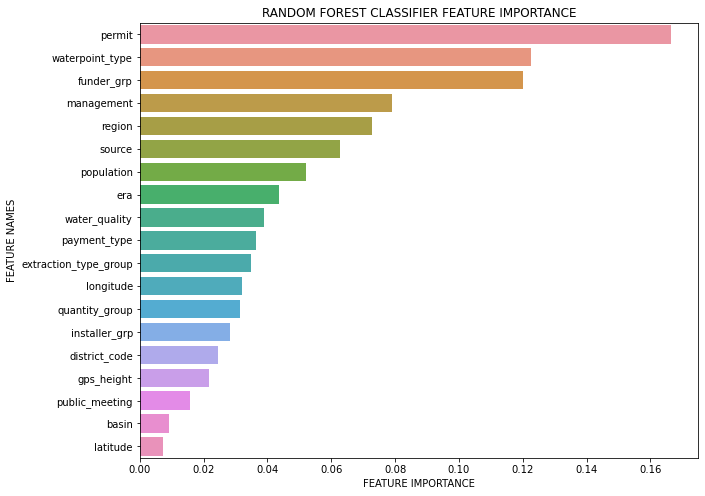

In [29]:
importance = model.feature_importances_
names = columns
model_type = 'RANDOM FOREST CLASSIFIER '

feature_importance = np.array(importance)
feature_names = np.array(names)

data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

pyplot.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

pyplot.title(model_type + 'FEATURE IMPORTANCE')
pyplot.xlabel('FEATURE IMPORTANCE')
pyplot.ylabel('FEATURE NAMES')